<h1>Introduction</h1>
<p>The goal of this project is to practice/develop/gain more experience with time series analysis.</p>
<p>Aim: Predict CO2 and NOX emissions using a variety of methods/models and recommend a suitable model for future prediction</p>
<p>Objectives:
<ul>
    <li></li>
    <li></li>
    <li></li>
</ul>
</p>
<p>Data source: the data used in this project is obtained from the <a href='https://archive.ics.uci.edu/ml/datasets/Air+Quality'>UCI machine learning repository</a> and contains 9358 instances of hourly averaged responses from an array of 5 metal oxide chemical sensors embedded in an Air Quality Chemical Multisensor Device.</p>

<h2>Part I: Read in and clean data</h2>
<p>Import standard libraries</p>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Read in data

In [2]:
df = pd.read_csv('AirQualityUCI.csv', delimiter=';')

Peek at data

In [3]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN


In [4]:
df.describe()

,PT08.S1(CO),NMHC(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),Unnamed: 15,Unnamed: 16
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,0.0,0.0
mean,1048.990061,-159.090093,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,NaN,NaN
std,329.832710,139.789093,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,NaN,NaN
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,NaN,NaN
25%,921.000000,-200.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,NaN,NaN
50%,1053.000000,-200.000000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,NaN,NaN
75%,1221.000000,-200.000000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,NaN,NaN
max,2040.000000,1189.000000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,NaN,NaN


As mentioned in the documentation, missing values are filled in with -200 which is why we have mins of -200. CO2 is not shown because it is probably of object type. Let's have a look

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   object 
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   object 
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   object 
 13  RH             9357 non-null   object 
 14  AH             9357 non-null   object 
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(10), object(7)
memory usage: 1.2+ MB


<p>OK, so let's clean the data in the following steps:
<ol>
    <li>Drop unecesasry columns: we only care about CO2 and NOx</li>
    <li>Convert Date & Time to datetime</li>
    <li>Set datetime as index</li>
    <li>Convert CO to float</li>
    <li>Fill in missing values</li>
</ol>
</p>

In [6]:
df.columns

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH', 'Unnamed: 15', 'Unnamed: 16'],
      dtype='object')

<p>1. drop columns</p>

In [7]:
df.drop(columns=['PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)','PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH', 'Unnamed: 15', 'Unnamed: 16'], inplace = True)

In [8]:
df.columns

Index(['Date', 'Time', 'CO(GT)', 'NOx(GT)'], dtype='object')

<p>2. Convert Date and Time to datetime</p>

In [9]:
df['Date_Time'] = df['Date'] + " " + df['Time']
df['Date_Time_index'] = pd.to_datetime(df['Date_Time'],format='%d/%m/%Y %H.%M.%S')

Drop null values before setting index

In [10]:
df.isnull().sum()

Date               114
Time               114
CO(GT)             114
NOx(GT)            114
Date_Time          114
Date_Time_index    114
dtype: int64

In [11]:
df.dropna(inplace=True)

<p>3. Set datetime as index and set Hourly frequency</p>

In [12]:
df.set_index('Date_Time_index', inplace=True)
df.index.freq = 'H'

In [13]:
df.head()

,Date,Time,CO(GT),NOx(GT),Date_Time
Date_Time_index,,,,,
2004-03-10 18:00:00,10/03/2004,18.00.00,"2,6",166.0,10/03/2004 18.00.00
2004-03-10 19:00:00,10/03/2004,19.00.00,2,103.0,10/03/2004 19.00.00
2004-03-10 20:00:00,10/03/2004,20.00.00,"2,2",131.0,10/03/2004 20.00.00
2004-03-10 21:00:00,10/03/2004,21.00.00,"2,2",172.0,10/03/2004 21.00.00
2004-03-10 22:00:00,10/03/2004,22.00.00,"1,6",131.0,10/03/2004 22.00.00


<p>4. Convert CO to float</p>

In [14]:
df['CO(GT)'] = df['CO(GT)'].apply(lambda x: float(x.replace(",",".")))

In [15]:
df.describe()

,CO(GT),NOx(GT)
count,9357.000000,9357.000000
mean,-34.207524,168.616971
std,77.657170,257.433866
min,-200.000000,-200.000000
25%,0.600000,50.000000
50%,1.500000,141.000000
75%,2.600000,284.000000
max,11.900000,1479.000000


<p>5. Fill in missing values</p>
<p>First let us see the spread of the data without the missing values</p>

In [16]:
df[(df['CO(GT)'] != -200) & (df['NOx(GT)'] != -200)].describe()

,CO(GT),NOx(GT)
count,7261.000000,7261.000000
mean,2.205647,255.313869
std,1.458013,215.347818
min,0.100000,2.000000
25%,1.100000,103.000000
50%,1.900000,188.000000
75%,2.900000,339.000000
max,11.900000,1479.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1a9945f8>,
      dtype=object)

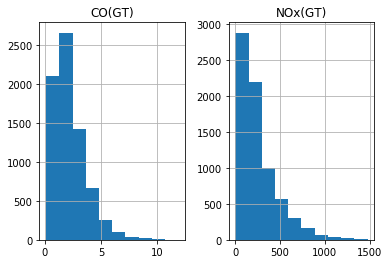

In [17]:
df[(df['CO(GT)'] != -200) & (df['NOx(GT)'] != -200)].hist()

Data is right skewed, let's use a boxplot to check for outliers

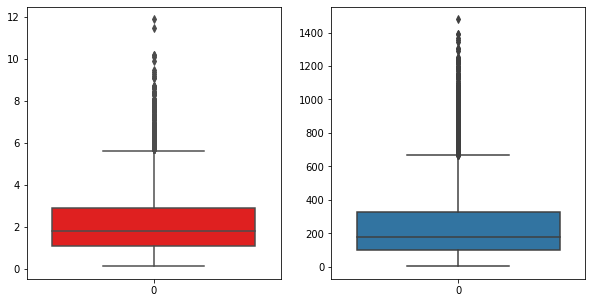

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.boxplot(data=df[df['CO(GT)'] != -200]['CO(GT)'],ax=ax[0],color='r')
sns.boxplot(data=df[df['NOx(GT)'] != -200]['NOx(GT)'],ax=ax[1])

Data contains outliers therefore filling missing values with mean is not the best strategy. Let's use median instead.

In [19]:
df.loc[df['NOx(GT)'] == -200,'NOx(GT)'] = df[df['NOx(GT)'] != -200]['NOx(GT)'].median()

In [20]:
df.loc[df['CO(GT)'] == -200,'CO(GT)'] = df[df['CO(GT)'] != -200]['CO(GT)'].median()

<h2>Part II: visualise data</h2>
<p>First, let's create two different series for CO and NOx</p>

In [21]:
df.columns

Index(['Date', 'Time', 'CO(GT)', 'NOx(GT)', 'Date_Time'], dtype='object')

In [22]:
co = df.drop(columns=['Date', 'Time', 'NOx(GT)', 'Date_Time'])

In [23]:
no = df.drop(columns=['Date', 'Time', 'CO(GT)', 'Date_Time'])

Plot CO and NOx with 7 day rolling average to see trends in data. Data is hourly therefore 7 days => 24*7 = 168

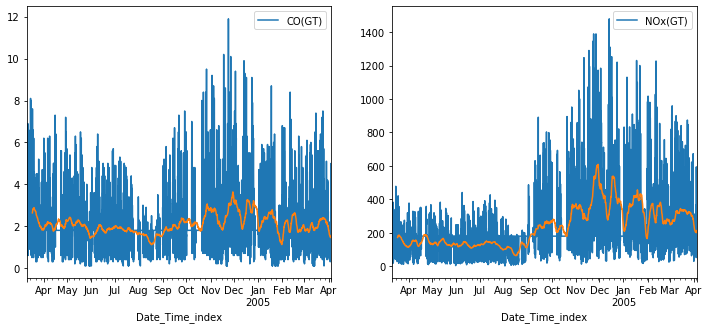

In [24]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
co['CO(GT)'].plot(ax=ax[0], legend=True)
co.rolling(window=168)['CO(GT)'].mean().plot(ax=ax[0])
no['NOx(GT)'].plot(ax=ax[1], legend=True)
no.rolling(window=168)['NOx(GT)'].mean().plot(ax=ax[1])

Data appears stationary but we will check this quantitatively later on. For now let's just decompose the data to check for trends and seasonality. To do this, we  use statsmodels

In [25]:
from statsmodels.tsa.seasonal import seasonal_decompose

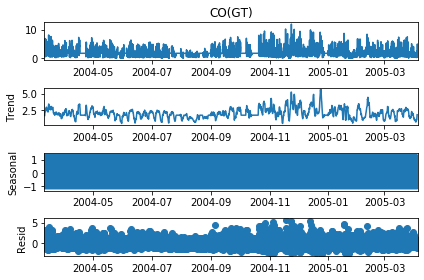

In [26]:
result_co = seasonal_decompose(co['CO(GT)'], model='additive')
result_co.plot();

There is no clear trend in data, let's zoom in on the seasonality

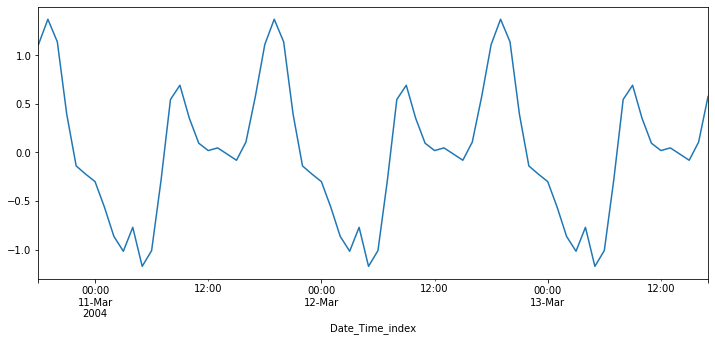

In [27]:
result_co.seasonal[:72].plot(figsize=(12,5))

As this is daily data, there is a clear seasonality of 24hrs. Now let's plot NOx

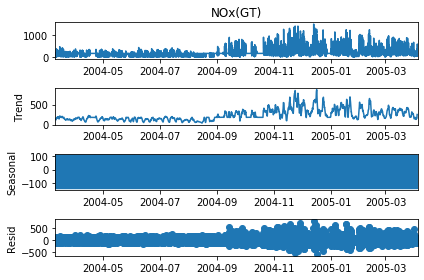

In [28]:
result_no = seasonal_decompose(no['NOx(GT)'], model='additive')
result_no.plot();

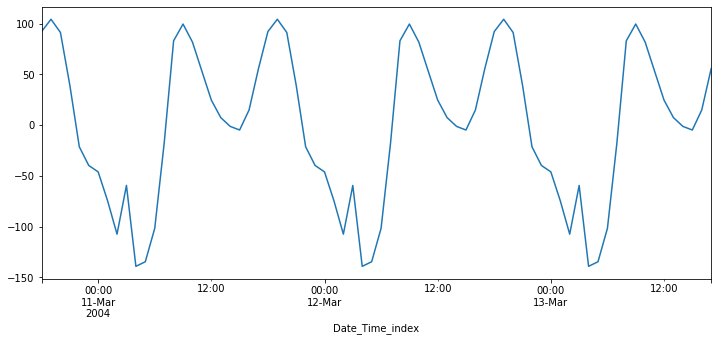

In [29]:
result_no.seasonal[:72].plot(figsize=(12,5))

NOx data also shows no clear trend and 24hr seasonality. However, the variance in the trend for both CO and NOx appears to suddenly increase around 2004-11. This might suggest some annual seasonality but we only have one year of data available.

In [30]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf,pacf,pacf_yw,pacf_ols
from pandas.plotting import lag_plot

 WHY IS THIS IMPORTANT?

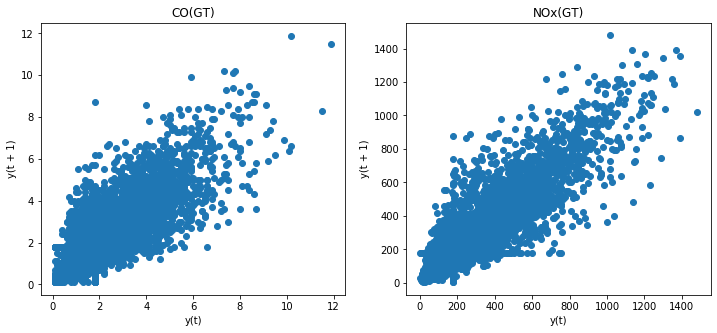

In [31]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
lag_plot(co['CO(GT)'],ax=ax[0])
ax[0].set_title('CO(GT)')
lag_plot(no['NOx(GT)'],ax=ax[1])
ax[1].set_title('NOx(GT)');

Autocorrelation  shows the correlation of a time series with itself lagged by $x$ time units. ACF \& PACF plots are used to determine the $p,d,q$ variables for ARIMA models. Later on we will perform a grid search to to find the orders for ARIMA models but let's just visualise the plots here.

In [32]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [33]:
lags = 24*7

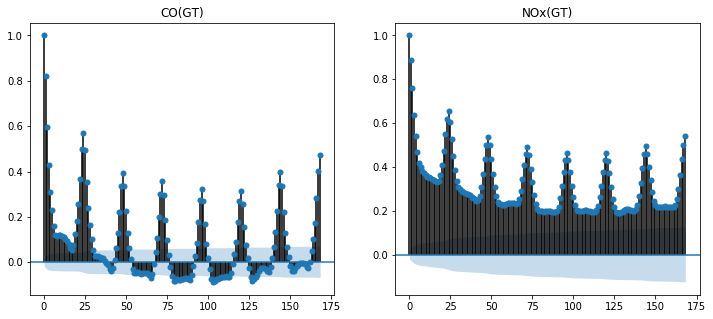

In [34]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
plot_acf(co['CO(GT)'],lags=lags,ax=ax[0],title='CO(GT)');
plot_acf(no['NOx(GT)'],lags=lags,ax=ax[1],title='NOx(GT)');

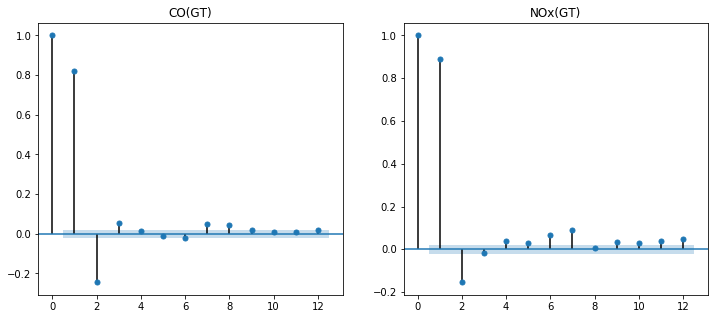

In [35]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
plot_pacf(co['CO(GT)'],lags=12,ax=ax[0],title='CO(GT)');
plot_pacf(no['NOx(GT)'],lags=12,ax=ax[1],title='NOx(GT)');

WHY IS THIS IMPORTANT. 

<h3>Test for stationarity</h3>
<p>It is important for time series data to be stationary because it is easy to make predictions on a stationary series since we can assume that the future statistical properties will not be different from those currently observed.</p>

</p> Here we will use the Augmented dicky fuller test to quantitatively check if the data is stationary. We do this by establishing a null hypotheis that the data is not stationary and set a p-value of 0.05. If the p-value comes back as less than 0.05 we then choose to reject the null hypothesis and treat the data as stationary.</p>

In [36]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

Check if CO is stationary

In [37]:
adf_test(co['CO(GT)'])

Augmented Dickey-Fuller Test: 
ADF test statistic     -1.088151e+01
p-value                 1.291276e-19
# lags used             3.600000e+01
# observations          9.320000e+03
critical value (1%)    -3.431052e+00
critical value (5%)    -2.861850e+00
critical value (10%)   -2.566935e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


Check if NOx is stationary

In [38]:
adf_test(no['NOx(GT)'])

Augmented Dickey-Fuller Test: 
ADF test statistic     -7.409146e+00
p-value                 7.211023e-11
# lags used             2.600000e+01
# observations          9.330000e+03
critical value (1%)    -3.431051e+00
critical value (5%)    -2.861850e+00
critical value (10%)   -2.566935e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


Both CO and NOx are stationary so now we can use them for prediction

<h2>Part III: Models and Predictions</h2>
<p>In this section, we will create train and evaluate the following models:
<ul>
    <li>Holt-Winters: Double and Triple exponential</li>
    <li>ARMA</li>
    <li>SARIMA</li>
    <li>RNN</li>
</ul>
</p>

First, let's split the data into a train and test set. To save on compute time, let's use only 60 days (2 months) for training and 7 days (1 week) for test set.

In [41]:
start_index_train = len(co) - 24*67 # 24hrs*67 days
end_index_train = len(co) - 24*7 # 24hrs*7 days

In [42]:
co_train = co.iloc[start_index_train:end_index_train]
co_test = co.iloc[end_index_train:]

In [43]:
no_train = no[start_index_train:end_index_train]
no_test = no[end_index_train:]

Let's check again for stationarity

In [54]:
adf_test(co_train['CO(GT)'])

Augmented Dickey-Fuller Test: 
ADF test statistic        -3.251065
p-value                    0.017213
# lags used               24.000000
# observations          1415.000000
critical value (1%)       -3.434980
critical value (5%)       -2.863585
critical value (10%)      -2.567859
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [55]:
adf_test(no_train['NOx(GT)'])

Augmented Dickey-Fuller Test: 
ADF test statistic        -3.556103
p-value                    0.006658
# lags used               24.000000
# observations          1415.000000
critical value (1%)       -3.434980
critical value (5%)       -2.863585
critical value (10%)      -2.567859
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


<h3>Holt-Winters</h3>
<p>Exponentially Weighted Moving Average methods assume that the future value of our variable depends on the average of its k  previous values. it will put more weight on values that occurred more recently.</p>
<p>Double exponential smoothing also considers the trend in the data while triple exponential smoothing addresses both trend and seasonality</p>

In [44]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

<p>DES = double, TES = triple</p>

In [45]:
co_holt_winters = co_train.copy()
co_holt_winters['DES'] = ExponentialSmoothing(co_train['CO(GT)'], trend='add').fit().fittedvalues.shift(-1)
co_holt_winters['TES'] = ExponentialSmoothing(co_train['CO(GT)'], trend='add',seasonal='mul',seasonal_periods=24).fit().fittedvalues

/Users/dareimamlawal/miniconda2/envs/py36/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


Let's have a look at the results

In [46]:
co_holt_winters.head()

,CO(GT),DES,TES
Date_Time_index,,,
2005-01-27 15:00:00,1.3,1.3,1.526418
2005-01-27 16:00:00,1.5,1.5,1.347137
2005-01-27 17:00:00,1.5,1.5,1.587853
2005-01-27 18:00:00,2.1,2.1,2.035792
2005-01-27 19:00:00,2.6,2.6,2.614353


Double exponential smoothing appears to fit the training data perfectly! Even though Triple exponential smoothing accounts for seasonality. Let's plot these results, we'll zoom in on both ends of the plots

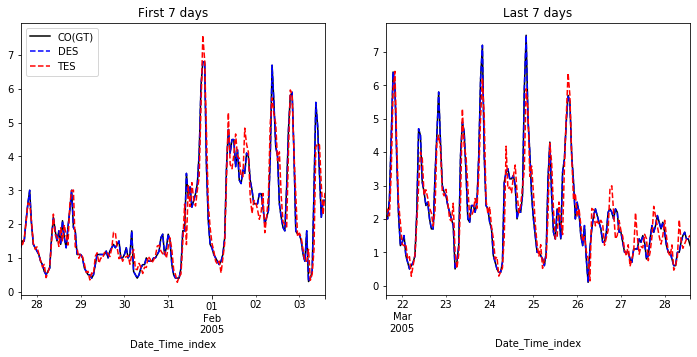

In [48]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
# first week
co_holt_winters['CO(GT)'][:168].plot(color='black',ax=ax[0]);
co_holt_winters['DES'][:168].plot(color='blue',style='--',ax=ax[0])
co_holt_winters['TES'][:168].plot(color='red',style='--',ax=ax[0])
ax[0].set_title('First 7 days')
# final week
co_holt_winters['CO(GT)'][-168:].plot(color='black',ax=ax[1]);
co_holt_winters['DES'][-168:].plot(color='blue',style='--',ax=ax[1])
co_holt_winters['TES'][-168:].plot(color='red',style='--',ax=ax[1])
ax[1].set_title('Last 7 days')
ax[0].legend()

Double exponential smoothing fits the training data perfectly, let's see how it does predicting the future

In [49]:
des_model_co = ExponentialSmoothing(co_train['CO(GT)'], trend='add').fit()
tes_model_co = ExponentialSmoothing(co_train['CO(GT)'], trend='add',seasonal='add',seasonal_periods=24).fit()

In [66]:
holt_winters = pd.DataFrame(des_model_co.forecast(len(co_test)).rename('DES'))
holt_winters['TES'] = tes_model_co.forecast(len(no_test))
holt_winters['y_true'] = co_test

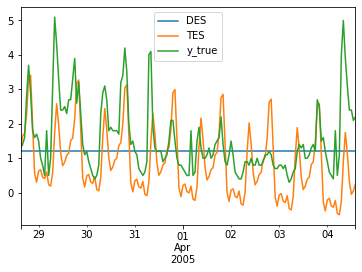

In [68]:
holt_winters.plot()

Although DES was better able to fit the training data, it is only able to predict the general trend hence why it predicts a constant (mean). TES does a better job of capturing the fluctuations and seasonality, the model does reasonably well for the first 2 days. However we can see the predictions are slowly decaying and getting further from the truth.

<h3>ARIMA</h3>
<p>Import auto_arima to use for grid search to find orders for the p,d,q terms for the arima models.</p>

In [69]:
from pmdarima import auto_arima

In [70]:
grid_search_co = auto_arima(co_train['CO(GT)'], start_p=0, start_q=0,
                          seasonal=False,
                          error_action='ignore',   # we don't want to know if an order does not work
                          suppress_warnings=True)  # we don't want convergence warnings
grid_search_co.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1440
Model:               SARIMAX(4, 0, 2)   Log Likelihood               -1549.510
Date:                Mon, 19 Oct 2020   AIC                           3115.021
Time:                        18:18:43   BIC                           3157.200
Sample:                             0   HQIC                          3130.766
                               - 1440                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.6015      0.064      9.452      0.000       0.477       0.726
ar.L1          1.6360      0.032     50.392      0.000       1.572       1.700
ar.L2         -1.8834      0.047    -40.481      0.000      -1.975      -1.792
ar.L3          1.2702      0.040     31.464      0.000       1.191       1.349
ar.L4         -0.3274      0.025    -12.981      0.000      -0.377      -0.278
ma.L1         -0.5059      0.027    -18.894      0.000      -0.558      -0.453
ma.L2          0.9427      0.025     38.336      0.000       0.895       0.991
sigma2         0.4985      0.013     37.177      0.000       0.472       0.525
===================================================================================
Ljung-Box (Q):                      377.66   Jarque-Bera (JB):               531.77
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.34   Skew:                             0.35
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# grid_search_no = auto_arima(no_train['NOx(GT)'], start_p=0, start_q=0,
#                           seasonal=False,
#                           error_action='ignore',   # we don't want to know if an order does not work
#                           suppress_warnings=True)  # we don't want convergence warnings
# grid_search_co.summary()

In [71]:
from statsmodels.tsa.arima_model import ARIMA,ARIMAResults

Fit an arima with order 4,0,2 based on results from the grid search with auto_arima

In [76]:
model = ARIMA(co_train['CO(GT)'],order=(4,0,2))
results = model.fit()
#results.summary()

In [111]:
# Obtain predicted values
start=len(co_train)
end=len(co_train)+len(co_test)-1
arima_predictions_co = pd.DataFrame(results.predict(start=start, end=end, dynamic=False, typ='levels').rename('ARIMA'))

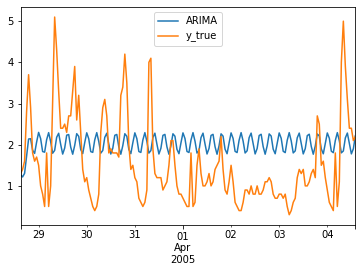

In [112]:
arima_predictions_co['y_true'] = co_test['CO(GT)']
arima_predictions_co.plot()

The ARIMA model does a bad job as expected because data is seasonal. The dip in emission between 02-04 is most likely due to  weekend, let's have a look.

In [127]:
pd.to_datetime('2005-04-03').dayofweek

6

Indeed 2005-04-03 is Sunday which is why the emissions are significantly lower than the rest of the week

<h3>SARIMA</h3>
<p>There is clearly a seasonal component to data so should be using Seasonal ARIMA (SARIMA) not just ARIMA. Let's set search again but specify seasonal as true this time. Use 24 (1 day) as periods (m).</p>

In [95]:
grid_search_co_seasonal = auto_arima(co_train['CO(GT)'], start_p=0, start_q=0,
                          seasonal=True, m=24,
                          error_action='ignore',   
                          suppress_warnings=True)
grid_search_co_seasonal.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                 1440
Model:             SARIMAX(3, 0, 1)x(2, 0, 1, 24)   Log Likelihood               -1313.713
Date:                            Mon, 19 Oct 2020   AIC                           2645.427
Time:                                    19:06:27   BIC                           2692.879
Sample:                                         0   HQIC                          2663.141
                                           - 1440                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0006      0.001      0.941      0.347      -0.001       0.002
ar.L1          0.6337      0.504      1.258      0.209      -0.354       1.621
ar.L2          0.0918      0.467      0.197      0.844      -0.823       1.007
ar.L3          0.0110      0.075      0.147      0.883      -0.136       0.158
ma.L1          0.2918      0.503      0.580      0.562      -0.694       1.277
ar.S.L24       1.1156      0.023     48.210      0.000       1.070       1.161
ar.S.L48      -0.1168      0.023     -5.084      0.000      -0.162      -0.072
ma.S.L24      -0.9654      0.013    -75.748      0.000      -0.990      -0.940
sigma2         0.3488      0.009     37.501      0.000       0.331       0.367
===================================================================================
Ljung-Box (Q):                       99.94   Jarque-Bera (JB):               642.52
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.12   Skew:                             0.40
Prob(H) (two-sided):                  0.22   Kurtosis:                         6.17
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [97]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

Choose orders from the auto_arima grid search

In [98]:
model_sarima_co = SARIMAX(co_train['CO(GT)'],order=(3,0,1),seasonal_order=(2,0,1,24))
results_sarima_co = model_sarima_co.fit()
results_sarima_co.summary()

/Users/dareimamlawal/miniconda2/envs/py36/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                             CO(GT)   No. Observations:                 1440
Model:             SARIMAX(3, 0, 1)x(2, 0, 1, 24)   Log Likelihood               -1301.067
Date:                            Mon, 19 Oct 2020   AIC                           2618.135
Time:                                    19:10:08   BIC                           2660.314
Sample:                                01-27-2005   HQIC                          2633.880
                                     - 03-28-2005                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.7764      0.049     36.472      0.000       1.681       1.872
ar.L2         -0.9908      0.051    -19.526      0.000      -1.090      -0.891
ar.L3          0.1982      0.025      7.948      0.000       0.149       0.247
ma.L1         -0.8601      0.047    -18.267      0.000      -0.952      -0.768
ar.S.L24       1.0978      0.014     77.513      0.000       1.070       1.126
ar.S.L48      -0.0986      0.014     -6.951      0.000      -0.126      -0.071
ma.S.L24      -0.9671      0.012    -81.137      0.000      -0.990      -0.944
sigma2         0.3427      0.009     37.209      0.000       0.325       0.361
===================================================================================
Ljung-Box (Q):                       66.58   Jarque-Bera (JB):               604.65
Prob(Q):                              0.01   Prob(JB):                         0.00
Heteroskedasticity (H):               1.12   Skew:                             0.40
Prob(H) (two-sided):                  0.22   Kurtosis:                         6.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [106]:
predictions_sarima_co = pd.DataFrame(results_sarima_co.predict(start=start, end=end, dynamic=False, typ='levels').rename('SARIMA'))

In [107]:
predictions_sarima_co['y_true'] = co_test['CO(GT)']

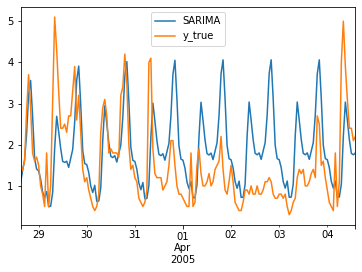

In [108]:
predictions_sarima_co.plot()

Sarima performs quite well (despite not converging) because it considers the seasonal component of the data. Let's see if a neural network will perform better.

<h3>Recurrent Neural Network</h3>

In [79]:
from sklearn.preprocessing import StandardScaler

In [80]:
scaler = StandardScaler()

In [81]:
scaled_co_train = scaler.fit_transform(co_train)
scaled_co_test = scaler.transform(co_test)

In [82]:
from keras.preprocessing.sequence import TimeseriesGenerator

Using TensorFlow backend.
/Users/dareimamlawal/miniconda2/envs/py36/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/dareimamlawal/miniconda2/envs/py36/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/dareimamlawal/miniconda2/envs/py36/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])

In [83]:
n_input = 24 # to capture daily seasonality
n_features = 1
generator = TimeseriesGenerator(scaled_co_train, scaled_co_train, length=n_input, batch_size=1)

In [84]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [85]:
model_rnn = Sequential()
model_rnn.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model_rnn.add(Dense(1))
model_rnn.add(Dense(1))
model_rnn.compile(optimizer='adam', loss='mse')

Instructions for updating:
Colocations handled automatically by placer.


In [86]:
model_rnn.fit_generator(generator,epochs=150)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
1416/1416 [==============================] - 32s 22ms/step - loss: 0.6198
Epoch 2/5
1416/1416 [==============================] - 32s 23ms/step - loss: 0.3645
Epoch 3/5
1416/1416 [==============================] - 36s 26ms/step - loss: 0.2925
Epoch 4/5
1416/1416 [==============================] - 35s 25ms/step - loss: 0.2774
Epoch 5/5
1416/1416 [==============================] - 36s 25ms/step - loss: 0.2438


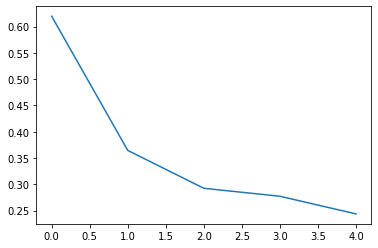

In [87]:
loss_per_epoch = model_rnn.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

We need previous 24 values for next prediction

In [88]:
first_eval_batch = scaled_co_train[-24:]

In [89]:
first_eval_batch = first_eval_batch.reshape((1, n_input, n_features))

In [90]:
test_predictions = []

first_eval_batch = scaled_co_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(scaled_co_test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model_rnn.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [91]:
true_predictions = scaler.inverse_transform(test_predictions)

In [92]:
co_test['pred'] = true_predictions

/Users/dareimamlawal/miniconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [93]:
co_test.head()

,CO(GT),pred
Date_Time_index,,
2005-03-28 15:00:00,1.3,1.148972
2005-03-28 16:00:00,1.4,1.161535
2005-03-28 17:00:00,1.6,1.242929
2005-03-28 18:00:00,2.8,1.417494
2005-03-28 19:00:00,3.7,1.662197


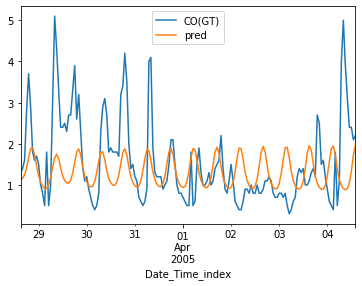

In [94]:
co_test.plot()

<h2>Compare all models</h2>

In [116]:
all_results = pd.DataFrame(co_test['CO(GT)'].rename('y_true'))
all_results['DES'] = holt_winters['DES']
all_results['TES'] = holt_winters['TES']
all_results['ARIMA'] = arima_predictions_co['ARIMA']
all_results['SARIMA'] = predictions_sarima_co['SARIMA']
#all_results['RNN'] = true_predictions

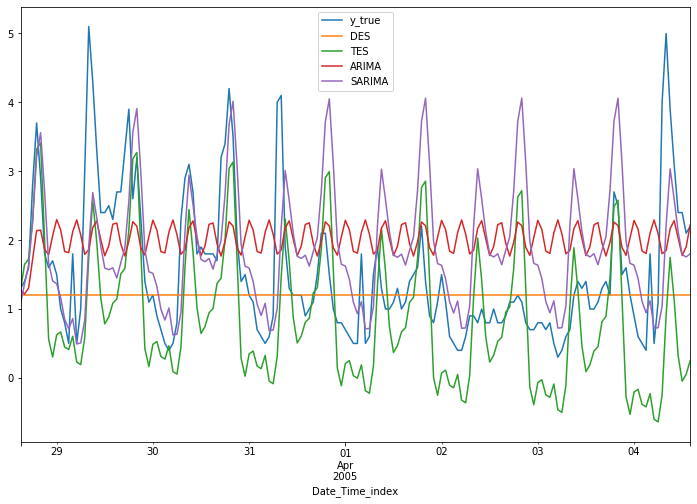

In [118]:
all_results.plot(figsize=(12,8))

In [119]:
from sklearn.metrics import mean_squared_error

In [123]:
mean_squared_error(all_results['DES'],all_results['y_true'])

1.145

In [121]:
mean_squared_error(all_results['TES'],all_results['y_true'])

1.3260765017067075

In [122]:
mean_squared_error(all_results['ARIMA'],all_results['y_true'])

1.3006276176070384

In [124]:
mean_squared_error(all_results['SARIMA'],all_results['y_true'])

1.1302378260758108

Comparing the plots of the predictions to the mean squared error (mse), we see that mse doesn't tell the full story of which models would be most useful in production. Based on the mse, the DES model performance is comparable to SARIMA and better than the others but the plots show that it is almost useless in predicting the future.